In [1]:
import json
from datetime import datetime

import numpy as np


# Notebook for Shift with Chenran

Shift on  28 and 29 September 2022 for testing Bayesian Optimisation (BO) against Reinforcement Learning (RL).

Once we know BO is working in the machine, the plan is to test BO and RL in pairs on the same problems (targets) and compare their performance in the real world.

In [2]:
# Define target (and thresholds) ... max steps is chosen seperately for each algorithm
# comment = "test"

# target_mu_x = 0.0
# target_sigma_x = 0.0
# target_mu_y = 0.0
# target_sigma_y = 0.0

# target_mu_x_threshold = 3.3198e-6
# target_mu_y_threshold = 3.3198e-6
# target_sigma_x_threshold = 3.3198e-6
# target_sigma_y_threshold = 3.3198e-6


In [3]:
# # Load problem
problem_index = 33

with open("problems.json", "r") as f:
    problem = json.load(f)[problem_index]

comment = f"problem_{problem_index:03d}"

# Note that the indicies are still according to the old order mu_x, mu_y, sigma_x, sigma_y
target_mu_x = problem["desired"][0]
target_sigma_x = problem["desired"][2]
target_mu_y = problem["desired"][1]
target_sigma_y = problem["desired"][3]

target_mu_x_threshold = 3.3198e-6
target_mu_y_threshold = 3.3198e-6
target_sigma_x_threshold = 3.3198e-6
target_sigma_y_threshold = 3.3198e-6


In [4]:
from ea_optimize import ARESEADOOCS

env = ARESEADOOCS(magnet_init_mode="constant", magnet_init_values=np.zeros(5))
env.reset()

initializing ocelot...


{'beam': array([ 0.00013445,  0.00335645, -0.00034624,  0.00184011], dtype=float32),
 'magnets': array([-2.5818379e-11, -2.8285231e-03,  8.1280665e-14, -2.5818379e-11,
         8.1175511e-14], dtype=float32),
 'target': array([-0.00115733,  0.0012515 , -0.00058173,  0.00138796], dtype=float32)}

 77%|███████▋  | 58/75 [11:07<04:11, 14.78s/it]/home/kaiserja/.conda/envs/rl39ng/lib/python3.9/site-packages/botorch/optim/optimize.py:306: RuntimeWarning: Optimization failed in `gen_candidates_scipy` with the following warning(s):
[OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 1.')]
Trying again with a new set of initial conditions.
  warnings.warn(first_warn_msg, RuntimeWarning)
/home/kaiserja/.conda/envs/rl39ng/lib/python3.9/site-packages/botorch/optim/optimize.py:328: RuntimeWarning: Optimization failed on the second try, after generating a new set of initial conditions.
  warnings.warn(
 79%|███████▊  | 59/75 [11:40<05:19, 19.98s/it]/home/kaiserja/.conda/envs/rl39ng/lib/python3.9/site-packages/botorch/optim/optimize.py:306: RuntimeWarning: Optimization failed in `gen_candidates_scipy` with the following warning(s):
[OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 1.')]
Trying again with a new set of ini

title = 'Beam Optimisation on AREABSCR1 using Bayesian Optimisation'
msg = 'Bayesian Optimisation optimised beam on AREABSCR1\n\nAgent: Bayesian Optimisation\nStart time: 2022-12-13 10:22:03.510161\nTime taken: 0:16:21.247471\nNo. of steps: 76\n\nBeam before:\n    mu_x    =  0.1693 mm\n    sigma_x =  3.3268 mm\n    mu_y    = -0.1627 mm\n    sigma_y =  1.9960 mm\n\nBeam after:\n    mu_x    = -1.0789 mm\n    sigma_x =  0.0987 mm\n    mu_y    = -2.1423 mm\n    sigma_y =  0.3148 mm\n\nTarget beam:\n    mu_x    = -1.0984 mm    (e = 0.0033 mm) :/\n    sigma_x =  0.2279 mm    (e = 0.0033 mm) :/\n    mu_y    = -1.9133 mm    (e = 0.0033 mm) :/\n    sigma_y =  0.1967 mm    (e = 0.0033 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0195 mm\n    |delta_sigma_x| =  0.1292 mm\n    |delta_mu_y|    =  0.2289 mm\n    |delta_sigma_y| =  0.1181 mm\n    \n    MAE =  0.1239 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   6.5858 1/m^2\n    AREAMQZM2 strength =  -0.0028 1/m^2\n    AREAMCVM1 kick     = 

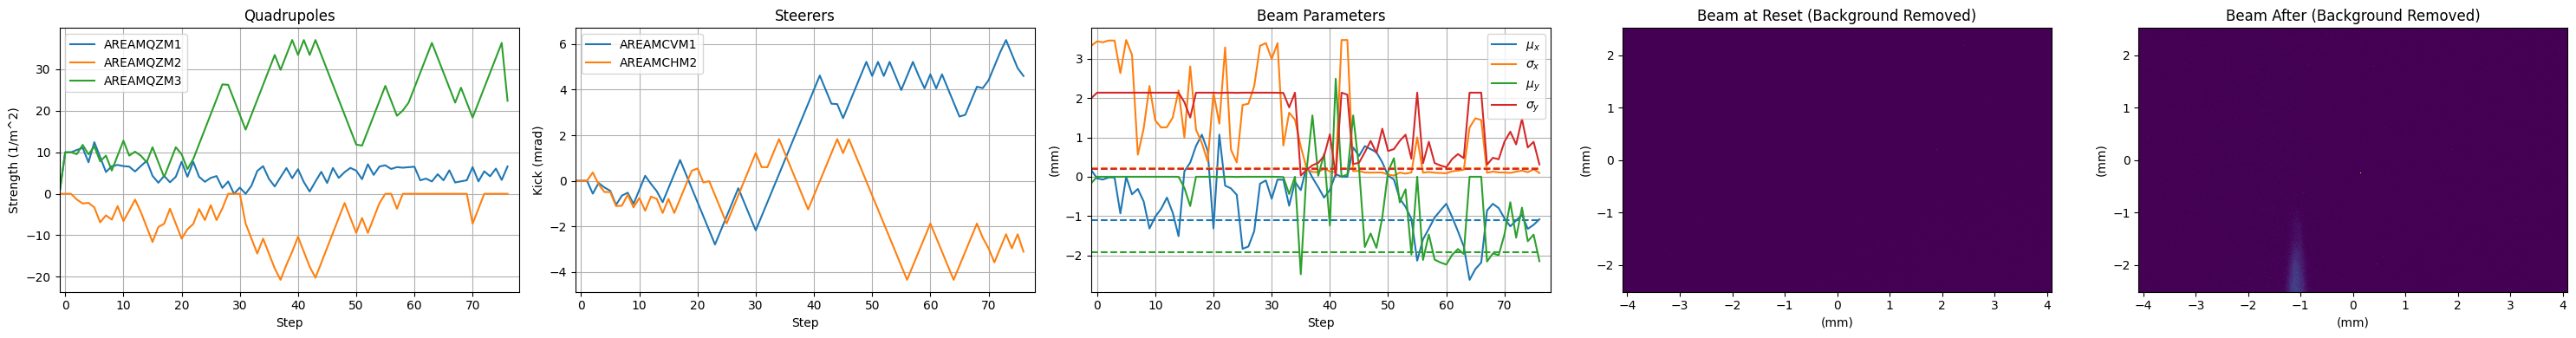

In [5]:
# Bayesian Optimisation
from ea_bo import optimize

optimize(
    target_mu_x=target_mu_x,
    target_sigma_x=target_sigma_x,
    target_mu_y=target_mu_y,
    target_sigma_y=target_sigma_y,
    target_mu_x_threshold=target_mu_x_threshold,
    target_mu_y_threshold=target_mu_y_threshold,
    target_sigma_x_threshold=target_sigma_x_threshold,
    target_sigma_y_threshold=target_sigma_y_threshold,
    max_steps=75,
    model_name="Bayesian Optimisation",
    logbook=True,
    data_log_dir=f"data/bo_vs_rl/real/bo/{datetime.now():%Y%m%d%H%M}_{comment}",
    progress_bar=True,
    callback=None,
    acquisition="EI",
    init_x=None,
    init_samples=5,
    filter_action=None,
    magnet_init_values=np.array([10, -10, 0, 10, 0]),
)


In [6]:
from ea_optimize import ARESEADOOCS

env = ARESEADOOCS(magnet_init_mode="constant", magnet_init_values=np.zeros(5))
env.reset()

{'beam': array([ 0.00013279,  0.00335786, -0.00021166,  0.0019544 ], dtype=float32),
 'magnets': array([-2.5818379e-11, -2.5818379e-11,  8.1280665e-14, -2.5818379e-11,
         8.1175511e-14], dtype=float32),
 'target': array([ 0.00198857,  0.00119551, -0.00043529,  0.0017474 ], dtype=float32)}

/home/kaiserja/.conda/envs/rl39ng/lib/python3.9/site-packages/stable_baselines3/common/save_util.py:166: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
  warnings.warn(
100%|██████████| 50/50 [08:38<00:00, 10.36s/it]


title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: polished-donkey-996\nStart time: 2022-12-13 10:39:17.418229\nTime taken: 0:08:43.643280\nNo. of steps: 50\n\nBeam before:\n    mu_x    =  0.1345 mm\n    sigma_x =  3.3565 mm\n    mu_y    = -0.3621 mm\n    sigma_y =  1.8266 mm\n\nBeam after:\n    mu_x    = -1.1088 mm\n    sigma_x =  0.0564 mm\n    mu_y    = -1.8719 mm\n    sigma_y =  0.1704 mm\n\nTarget beam:\n    mu_x    = -1.0984 mm    (e = 0.0033 mm) :/\n    sigma_x =  0.2279 mm    (e = 0.0033 mm) :/\n    mu_y    = -1.9133 mm    (e = 0.0033 mm) :/\n    sigma_y =  0.1967 mm    (e = 0.0033 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0104 mm\n    |delta_sigma_x| =  0.1715 mm\n    |delta_mu_y|    =  0.0414 mm\n    |delta_sigma_y| =  0.0263 mm\n    \n    MAE =  0.0624 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   4.4532 1/m^2\n    AREAMQZM2 strength =  -3.3021 1/m^2\n    AREAMCVM1 kick 

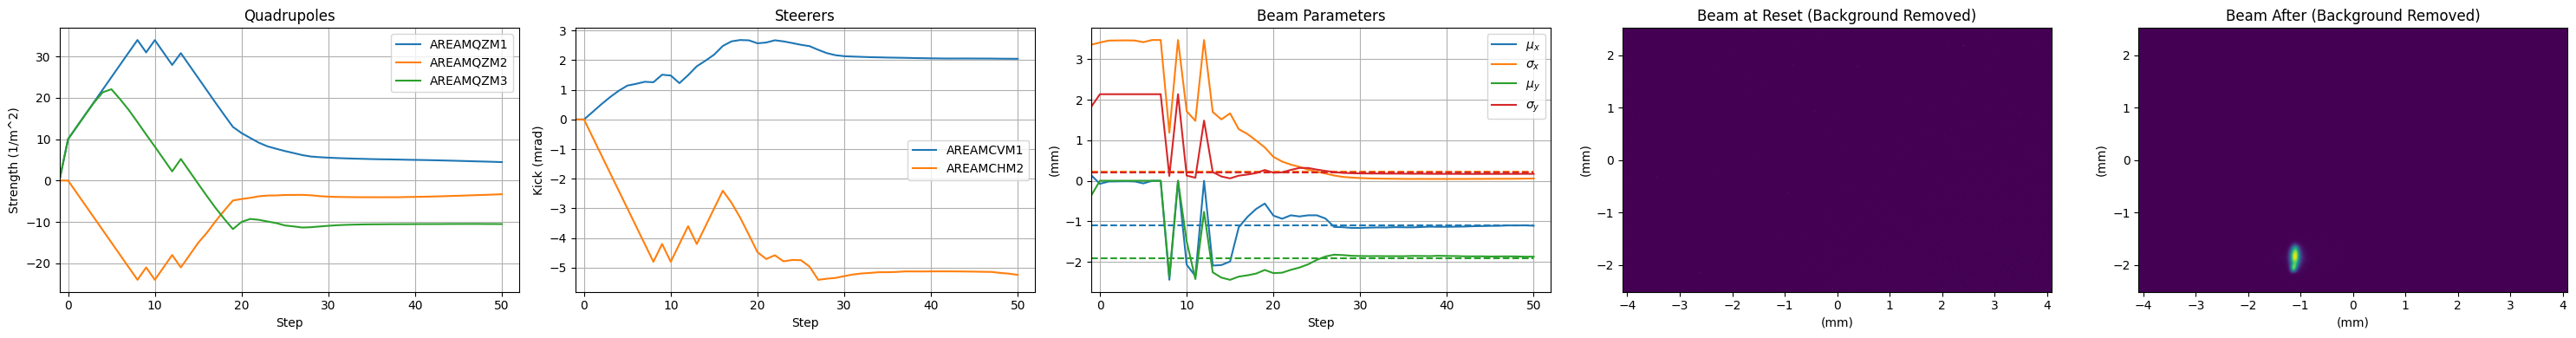

In [7]:
# Reinforcement Learning
from ea_optimize import optimize_donkey

optimize_donkey(
    target_mu_x=target_mu_x,
    target_sigma_x=target_sigma_x,
    target_mu_y=target_mu_y,
    target_sigma_y=target_sigma_y,
    target_mu_x_threshold=target_mu_x_threshold,
    target_mu_y_threshold=target_mu_y_threshold,
    target_sigma_x_threshold=target_sigma_x_threshold,
    target_sigma_y_threshold=target_sigma_y_threshold,
    max_steps=50,
    model_name="polished-donkey-996",
    logbook=True,
    data_log_dir=f"data/bo_vs_rl/real/rl/{datetime.now():%Y%m%d%H%M}_{comment}",
    progress_bar=True,
    callback=None,
)


In [8]:
# from ea_optimize import ARESEADOOCS

# env = ARESEADOOCS(magnet_init_mode="constant", magnet_init_values=np.zeros(5))
# env.reset()

In [9]:
# # Bayesian Optimisation
# from ea_bo import optimize

# optimize(
#     target_mu_x=target_mu_x,
#     target_sigma_x=target_sigma_x,
#     target_mu_y=target_mu_y,
#     target_sigma_y=target_sigma_y,
#     target_mu_x_threshold=target_mu_x_threshold,
#     target_mu_y_threshold=target_mu_y_threshold,
#     target_sigma_x_threshold=target_sigma_x_threshold,
#     target_sigma_y_threshold=target_sigma_y_threshold,
#     max_steps=75,
#     model_name="Bayesian Optimisation",
#     logbook=True,
#     data_log_dir=f"data/bo_vs_rl/real/bo_ucb/{datetime.now():%Y%m%d%H%M}_{comment}",
#     progress_bar=True,
#     callback=None,
#     acquisition="UCB",
#     init_x=None,
#     init_samples=5,
#     filter_action=None,
#     magnet_init_values=np.array([10, -10, 0, 10, 0]),
# )
